In [217]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz

In [227]:
seed = 0
expl_method = "LayerXAct"
data_num = 2
dataset = "center_crop_224"
orig_input_method = "center_crop_224"

In [228]:
with open(f"./val_{dataset}_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_dataset_{dataset}_orig_input_method_{orig_input_method}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n03840681/ILSVRC2012_val_00039880.JPEG
ILSVRC2012_val_00039880.JPEG


In [229]:
for res in results:
    print(res['zero_contain_rate'])

0.5928531568877551
0.465023118622449
0.40001195790816324
0.35999282525510207
0.3305165816326531
0.30600286989795916
0.28079161352040816
0.25075733418367346
0.22022480867346939
0.19541214923469388
0.16996173469387754
0.1480389030612245
0.1268734056122449
0.1065250318877551
0.08663504464285714
0.06471221301020408
0.04707429846938776
0.03268494897959184
0.015146683673469387


tensor(0.9472)


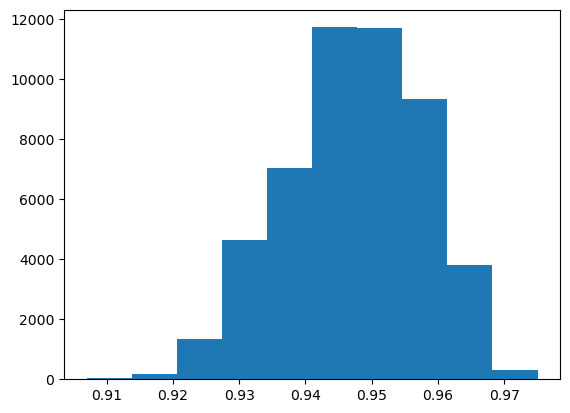

In [230]:
plt.hist(results[0]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[0]['coverage_prob'].flatten().mean())

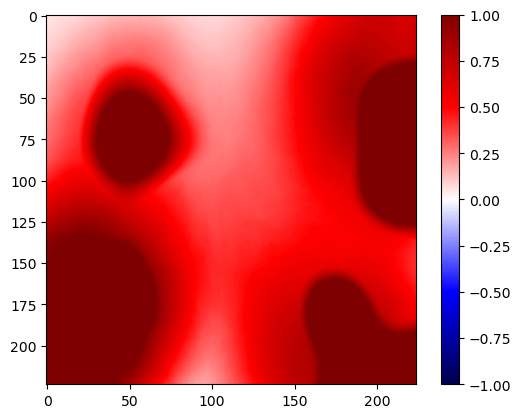

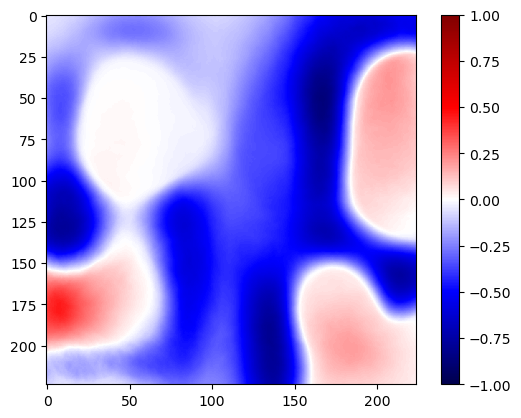

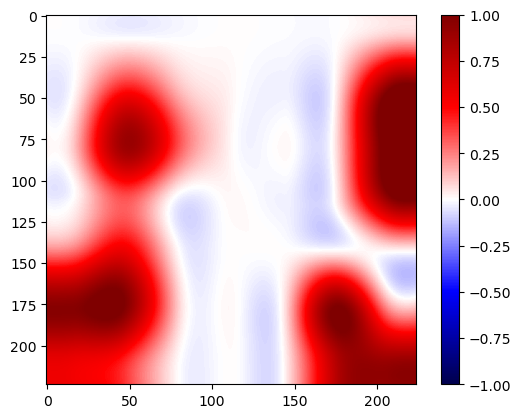

In [225]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


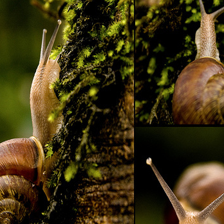

In [226]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


(array([ 3406.,  4991.,  6773., 12437.,  7635.,  5989.,  3801.,  1935.,
         1718.,  1491.]),
 array([0.05275429, 0.21840647, 0.38405865, 0.54971081, 0.71536303,
        0.88101518, 1.04666734, 1.21231949, 1.37797177, 1.54362392,
        1.70927608]),
 <BarContainer object of 10 artists>)

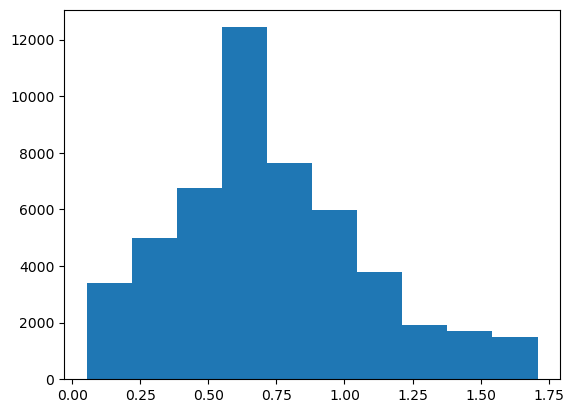

In [168]:
plt.hist(abs(results[0]['conf_high'] - results[0]['conf_low']).flatten())

In [195]:
tmp1 =results[0]['orig_expl'].squeeze()

In [200]:
tmp2 = results[0]['orig_expl'].squeeze()

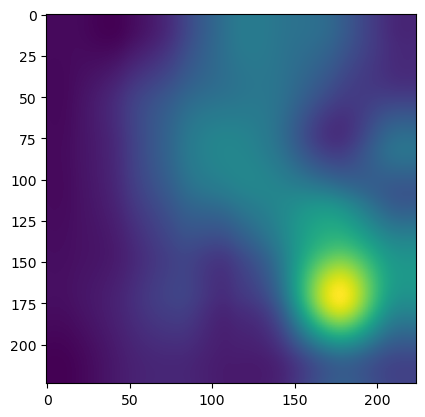

In [203]:
plt.imshow(tmp1)

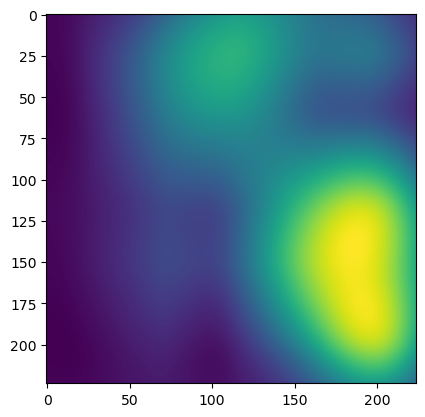

In [204]:
plt.imshow(tmp2)